In [2]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np
from numba import jit

In [400]:
@jit(nopython=True)
def sigmoid(x):
    return 1/(1+np.exp(-x))

@jit(nopython=True)
def array_to_vec(x):
    y = x.flatten()
    N = y.shape[0]
    out = np.zeros((N,1))
    for i in range(0,N,1):
        out[i,0] = y[i]
    return out

@jit(nopython=True)
def RNN_integrate(initial_state, A, t0, tf, delta_t):# system's dimension
    N = initial_state.shape[0]
    times = np.arange(t0, tf+delta_t, delta_t) #other option np.linspace(t_span[0], t_span[1], int( (t_span[1]-t_span[0])/delta_t+1) )
    T = times.shape[0] # number of time steps
    states = np.zeros((N,T))
    x0 = initial_state.flatten()
    states[:,0] = x0
    for step in range(T-1):
        x = array_to_vec(states[:,step])
        vector_field = -x + 1.0 * A @ np.tanh(x)
        new_state = x + delta_t * vector_field
        states[:,step+1] = new_state.flatten()
    return times, states

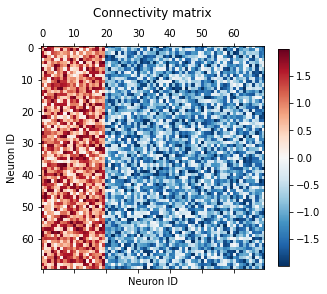

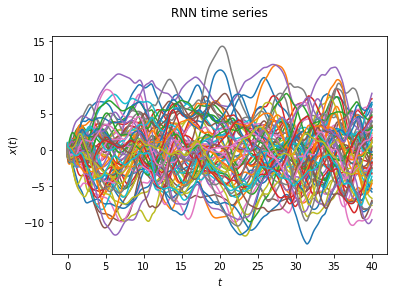

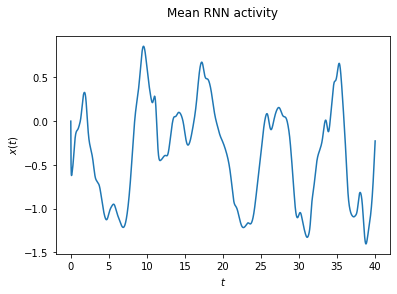

In [401]:
n_I = 50
n_E = 20
n = n_I + n_E
x_0 = 1*np.linspace(-1,1,n).reshape(n,1)
A = 2*np.hstack((np.random.rand(n,n_E), -np.random.rand(n,n_I) ))

fig, ax = plt.subplots(figsize=(5,5))
im = ax.matshow(A, cmap = 'RdBu_r')
ax.set_xlabel('Neuron ID')
ax.set_ylabel('Neuron ID')
ax.set_title('Connectivity matrix', fontsize=12, pad=12)
cbar = fig.colorbar(im, ax=ax, shrink=0.8)
plt.show()

dt = 0.001

t,x = RNN_integrate(x_0, A, 0, 40, dt)

fig, ax = plt.subplots()
ax.plot(t,x.T)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=10)
ax.set_title('RNN time series', fontsize=12, pad=20)
plt.show()

fig, ax = plt.subplots()
ax.plot(t,np.mean(x,axis=0))
ax.set_title('Mean RNN activity', fontsize=12, pad=20)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=10)
plt.show()

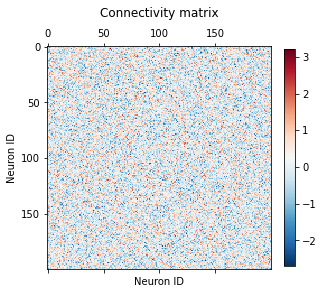

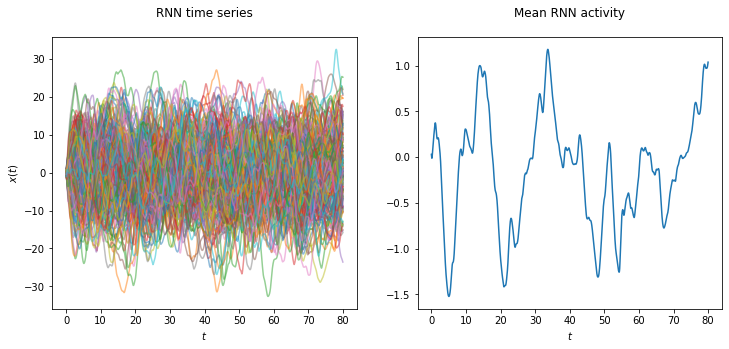

In [398]:
n = 200
sigma = 10
x_0 = 2*np.random.rand(n,1)-1
A = sigma/np.sqrt(n)*np.random.randn(n,n)

fig, ax = plt.subplots(figsize=(5,5))
im = ax.matshow(A, cmap = 'RdBu_r')
ax.set_xlabel('Neuron ID')
ax.set_ylabel('Neuron ID')
ax.set_title('Connectivity matrix', fontsize=12, pad=12)
cbar = fig.colorbar(im, ax=ax, shrink=0.8)
plt.show()

dt = 0.001

t,x = RNN_integrate(x_0, A, b, 0, 80, dt)

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(t,x.T, alpha=0.5)
ax[0].set_xlabel('$t$', fontsize=10)
ax[0].set_ylabel('$x(t)$', fontsize=10)
ax[0].set_title('RNN time series', fontsize=12, pad=20)

ax[1].plot(t,np.mean(x,axis=0))
ax[1].set_title('Mean RNN activity', fontsize=12, pad=20)
ax[1].set_xlabel('$t$', fontsize=10)
plt.show()

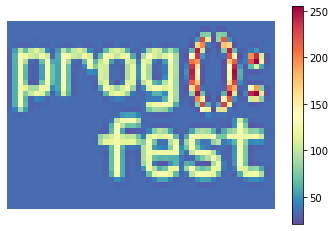

In [403]:
from PIL import Image
import os
cwd = os.getcwd()
image = Image.open(cwd + '/figures/progfest.png')
image = image.convert('L')
image = image.resize((50,35))# 100,71
im = np.asarray(image)
im = im.astype('double')
plt.imshow(im, cmap='Spectral_r')
plt.axis('off')
plt.colorbar()
plt.show()

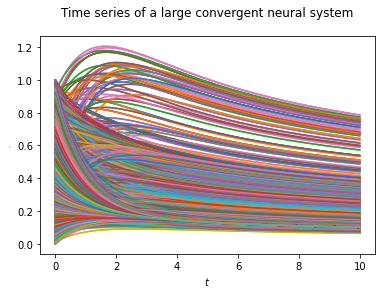

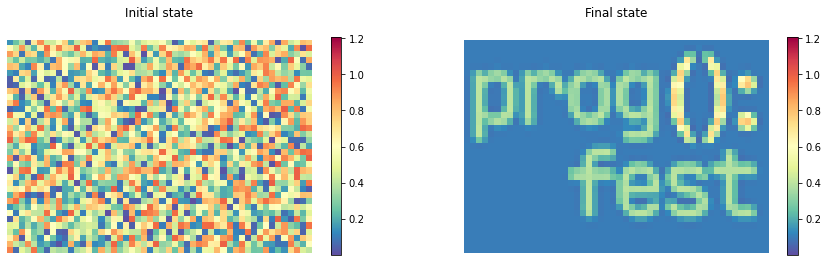

In [404]:
n0 = 35
n1 = 50
n = n0*n1
x_0 = np.random.rand(n,1)
u = im.flatten().reshape(n,1)
u = u/u.max()
A = 1/np.sqrt(8*n)*u @ u.T
dt = 0.001

t,x = RNN_integrate(x_0, A, 0, 10, dt)

fig, ax = plt.subplots()
ax.plot(t,x.T)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=1)
ax.plot(t,x.T, alpha = 0.8)
ax.set_title('Time series of a large convergent neural system', fontsize=12, pad=20)
plt.show()

T = len(t)
X = x.reshape(n0,n1,T)
Xmin = X.min()
Xmax = X.max()

fig, ax = plt.subplots(1,2,figsize=(15,5))
im0 = ax[0].matshow(X[:,:,0], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[0].axis('off')
ax[0].set_title('Initial state', fontsize=12)
cbar = fig.colorbar(im0, ax=ax[0], shrink=0.8)

im1 = ax[1].matshow(X[:,:,-1], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[1].axis('off')
ax[1].set_title('Final state', fontsize=12)
cbar = fig.colorbar(im1, ax=ax[1], shrink=0.8)
plt.show()

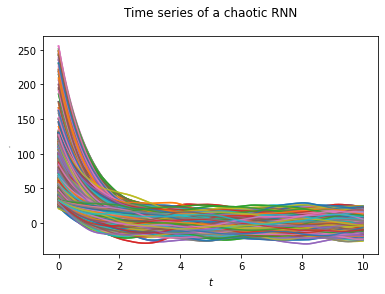

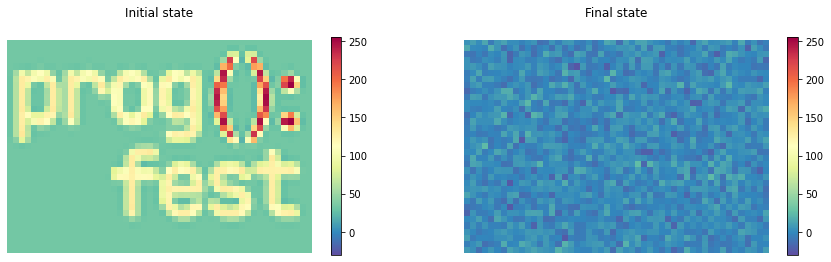

In [405]:
n0 = 35
n1 = 50
n = n0*n1

x_0 = im.flatten().reshape(n,1)

sigma = 10
A = sigma/np.sqrt(n)*np.random.randn(n,n)

dt = 0.001

t,x = RNN_integrate(x_0, A, 0, 10, dt)

fig, ax = plt.subplots()
ax.plot(t,x.T)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=1)
ax.plot(t,x.T, alpha = 0.8)
ax.set_title('Time series of a chaotic RNN', fontsize=12, pad=20)
plt.show()

T = len(t)
X = x.reshape(n0,n1,T)
Xmin = X.min()
Xmax = X.max()

fig, ax = plt.subplots(1,2,figsize=(15,5))
im0 = ax[0].matshow(X[:,:,0], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[0].axis('off')
ax[0].set_title('Initial state', fontsize=12)
cbar = fig.colorbar(im0, ax=ax[0], shrink=0.8)

im1 = ax[1].matshow(X[:,:,-1], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[1].axis('off')
ax[1].set_title('Final state', fontsize=12)
cbar = fig.colorbar(im1, ax=ax[1], shrink=0.8)
plt.show()